<a href="https://colab.research.google.com/github/tausif04/Data-Mining-and-Machine-Learning-Lab/blob/main/Lab_4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/My Dataset/student_habits_performance.csv')
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print(pd.isnull(df).sum())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [5]:
#Data Preprocessing
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# create a binary classification - Pass,if the score is 60 or above, otherwiseFail.
df_encoded['exam_outcome'] = pd.cut(df_encoded['exam_score'], bins=[0, 59.9, 100], labels=['Fail', 'Pass'])
print(df_encoded.head())

  student_id  age  study_hours_per_day  social_media_hours  netflix_hours  \
0      S1000   23                  0.0                 1.2            1.1   
1      S1001   20                  6.9                 2.8            2.3   
2      S1002   21                  1.4                 3.1            1.3   
3      S1003   23                  1.0                 3.9            1.0   
4      S1004   19                  5.0                 4.4            0.5   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   85.0          8.0                   6   
1                   97.3          4.6                   6   
2                   94.8          8.0                   1   
3                   71.0          9.2                   4   
4                   90.9          4.9                   3   

   mental_health_rating  exam_score  ...  gender_Other  part_time_job_Yes  \
0                     8        56.2  ...         False              False   
1               

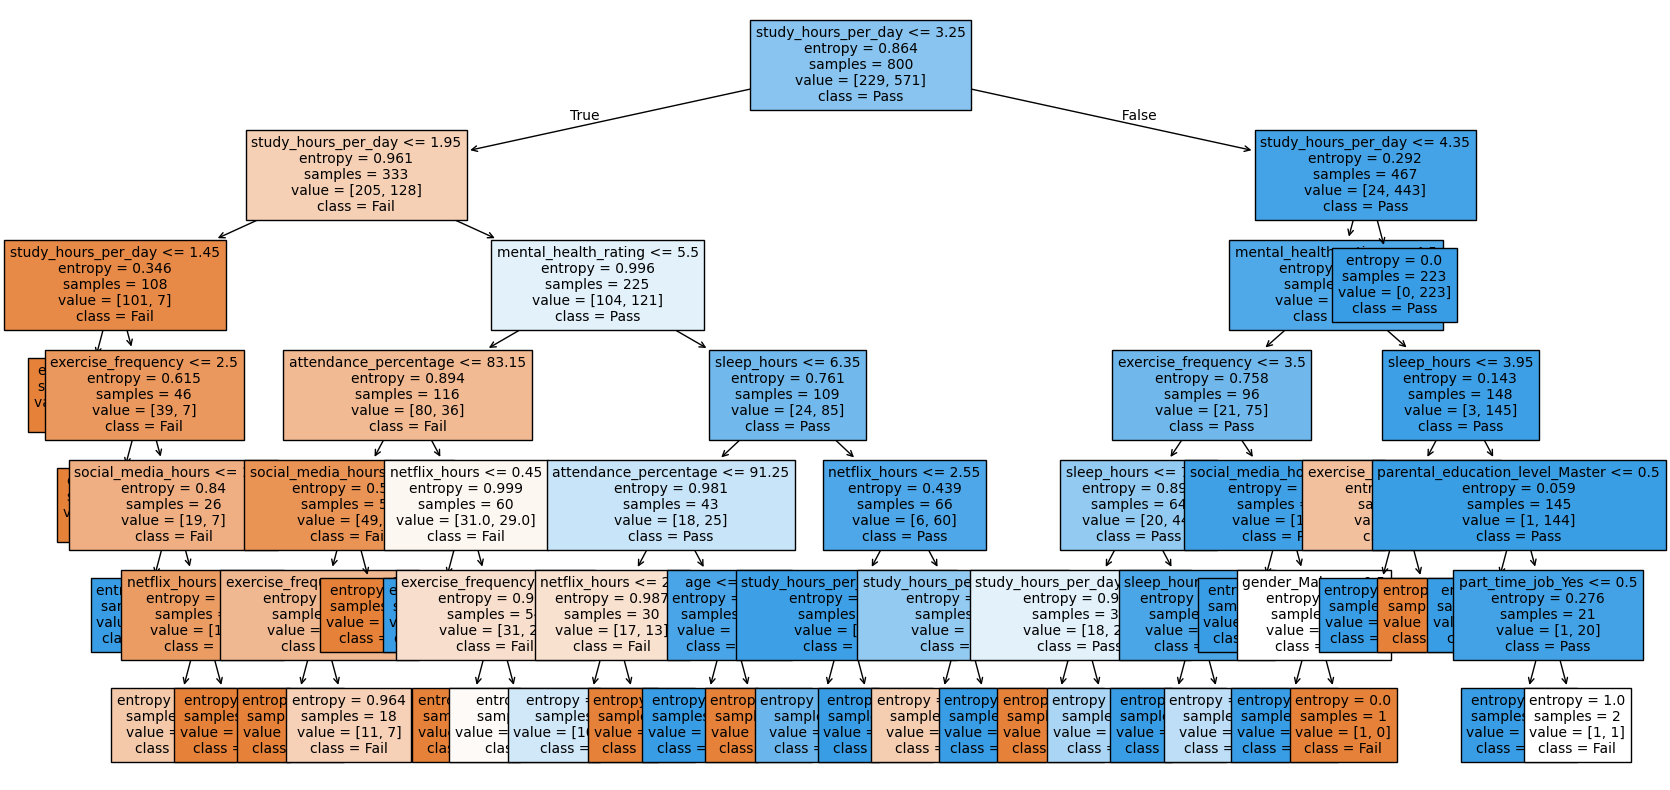

In [18]:
X = df_encoded.drop(['student_id', 'exam_score', 'exam_outcome'], axis=1)
y = df_encoded['exam_outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=6 , random_state=42)
dtree.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(dtree,filled=True,feature_names=X.columns,class_names=['Fail', 'Pass'],fontsize=10)
plt.show()

In [14]:
#prediction
y_pred=dtree.predict(X_test)
print("---------Predicton result----------")
print(y_pred[:10])
print("*"*20)
print(y_test[:10])


---------Predicton result----------
['Pass' 'Pass' 'Pass' 'Pass' 'Fail' 'Pass' 'Pass' 'Pass' 'Fail' 'Pass']
********************
521    Pass
737    Pass
740    Pass
660    Pass
411    Fail
678    Fail
626    Pass
513    Pass
859    Fail
136    Pass
Name: exam_outcome, dtype: category
Categories (2, object): ['Fail' < 'Pass']


In [15]:
#Accuracy Check
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.86
